# ROC Curve
Measuring the area under the ROC curve is also a very useful method for evaluating a model. By plotting the true positive rate (sensitivity) versus the false-positive rate (1 — specificity), we get the Receiver Operating Characteristic (ROC) curve. This curve allows us to visualize the trade-off between the true positive rate and the false positive rate.

The following are examples of good ROC curves. The dashed line would be random guessing (no predictive value) and is used as a baseline; anything below that is considered worse than guessing. We want to be toward the top-left corner:

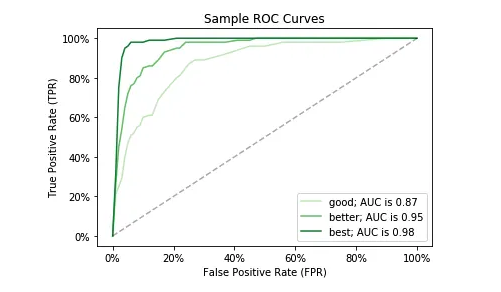

AUC - Test Set: 81.07%


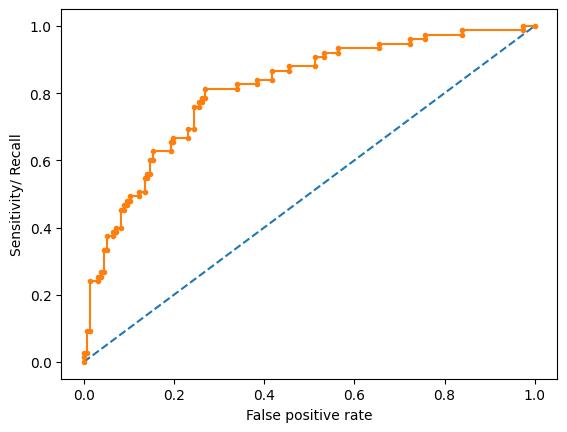

In [3]:
#Classification Area under curve
import warnings
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
dataframe = pandas.read_csv(url)
dat = dataframe.values
X = dat[:,:-1]
y = dat[:,-1]
seed = 7
#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=7)
model=LogisticRegression()
model.fit(X_train, y_train)

# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()